In [1]:
# Importing required libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# Read and load data

country = pd.read_csv("Country-data.csv")
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Shape of the dataframe

country.shape

(167, 10)

In [4]:
#Baisc info of the dataframe

country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### There are no missing values and the data types are correct

In [5]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Exports, health and imports are a percentage of overall GDPP. Hence, it requires conversion to its original values.

In [6]:
# Converting exports, health and imports to its original values

cols = ['exports','health','imports']

def convert_percent(col):
    country[col] = country[col]*country['gdpp']

for i in cols:
    convert_percent(i)

country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,5530.0,4191.74,24829.7,1610,9.44,56.2,5.82,553
1,Albania,16.6,114520.0,26789.50,198774.0,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,171264.0,18598.20,140044.0,12900,16.10,76.5,2.89,4460
3,Angola,119.0,219919.0,10060.50,151437.0,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,555100.0,73566.00,718580.0,19100,1.44,76.8,2.13,12200


In [7]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,1.670000e+02,167.000000,1.670000e+02,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7.420619e+05,105673.320419,6.588352e+05,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,1.797389e+06,180140.890556,1.471081e+06,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920e+02,1282.120000,6.510920e+01,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,4.471400e+04,7853.550000,6.402150e+04,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1.777440e+05,32188.600000,2.045580e+05,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7.278000e+05,97694.000000,7.719600e+05,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,1.837500e+07,866360.000000,1.491000e+07,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Exploratory Data Analysis

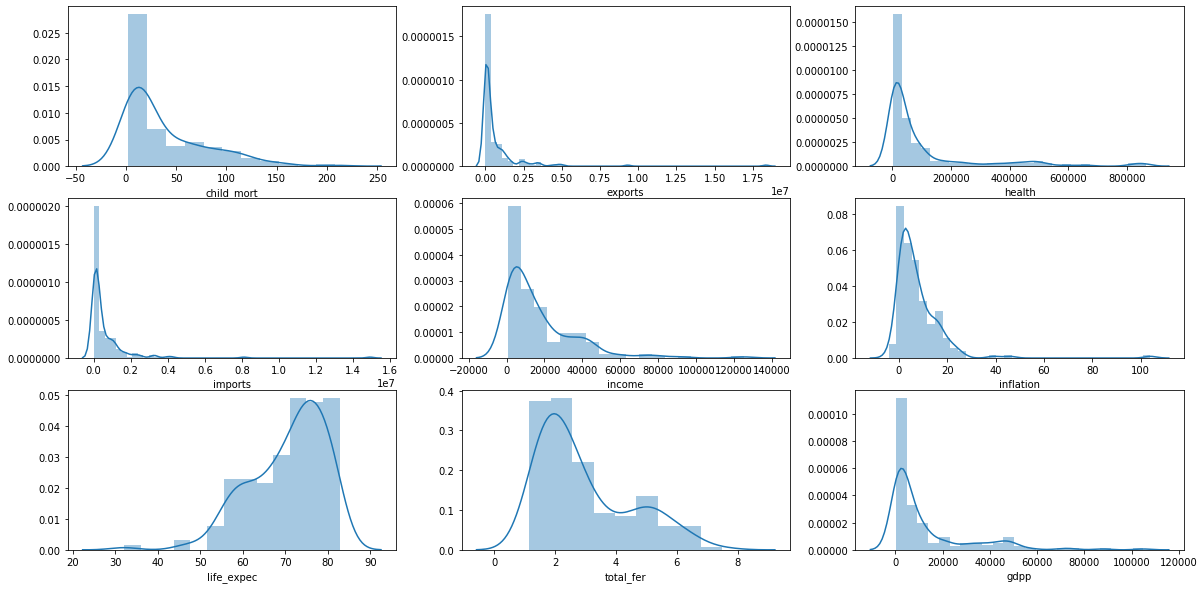

In [8]:
# Looking at plots of the distributions of all features

plt.figure(figsize = (20,10))
features = country.columns[1:]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(country[i[1]])

#### As expected, child_mort, exports, health, imports, income, inflation, total_fer and gdpp are positively skewed and life_expec is negatively skewed

# Outlier Treatment

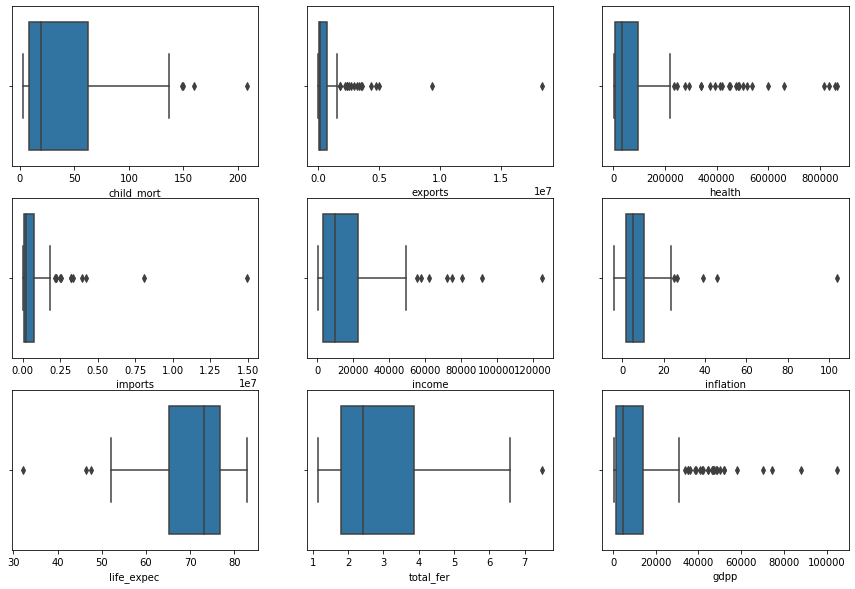

In [9]:
# Checking for outliers

plt.figure(figsize = (15,10))
features = country.columns[1:]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country[i[1]])

#### There seem to be outliers present in every feature

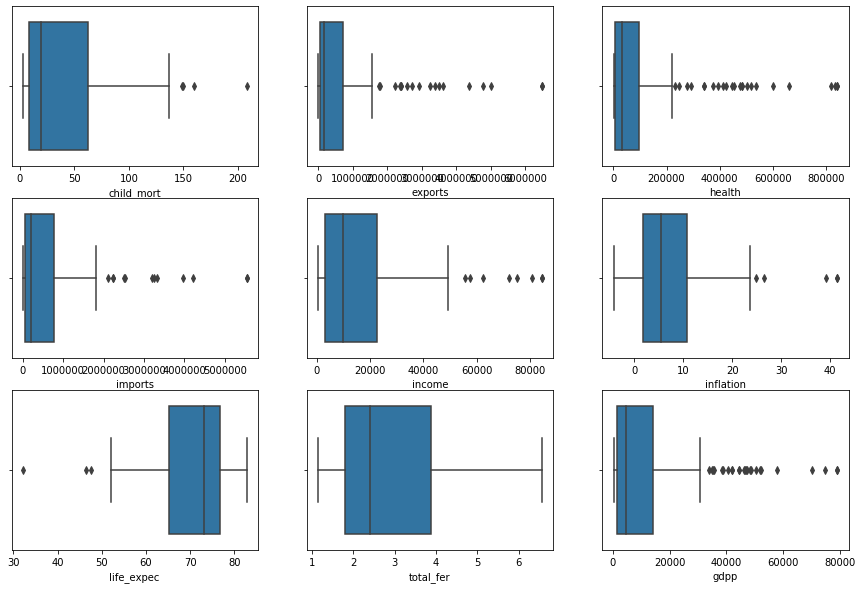

In [10]:
# Soft capping exports, health, imports, income, inflation, total_fer and gdpp
# Imputing values > upper by upper

def capping(col):
    upper = country[col].quantile(0.99)
    country[col][country[col]>=upper] = upper

features = ['exports','health','imports','income','inflation','total_fer','gdpp']

for i in features:
    capping(i)

plt.figure(figsize = (15,10))
features = country.columns[1:]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country[i[1]])

#### Now the outliers look much better and not too widely apart from each other
#### Soft capping done so that we do not lose too much information

In [11]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,1.670000e+02,167.000000,1.670000e+02,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6.538215e+05,105420.662216,5.873135e+05,16857.550898,7.380970,70.555689,2.942259,12756.826347
std,40.328931,1.141531e+06,179084.534231,9.422701e+05,17957.012855,7.793224,8.893172,1.498340,17430.208938
min,2.600000,1.076920e+02,1282.120000,6.510920e+01,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,4.471400e+04,7853.550000,6.402150e+04,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1.777440e+05,32188.600000,2.045580e+05,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7.278000e+05,97694.000000,7.719600e+05,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,6.479426e+06,841033.040000,5.537139e+06,84374.000000,41.478000,82.800000,6.563600,79088.000000


# Hopkin's Statistic Check

In [12]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [13]:
hopkins(country.drop('country',axis = 1))

0.9004790194079437

#### Hopkin's score is high so a clustering exercise can be performed on the data set

# K-Means Clustering

In [14]:
country1 = country.drop('country',axis = 1)

In [15]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,5530.0,4191.74,24829.7,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,114520.0,26789.50,198774.0,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,171264.0,18598.20,140044.0,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,219919.0,10060.50,151437.0,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,555100.0,73566.00,718580.0,19100.0,1.44,76.8,2.13,12200.0


In [16]:
# Scaling features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
country1 = scaler.fit_transform(country1)

country1 = pd.DataFrame(country1)
country1.columns = country.columns[1:]
country1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619092,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.647866,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.670423,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179234,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.704258,-0.543736,-0.032042


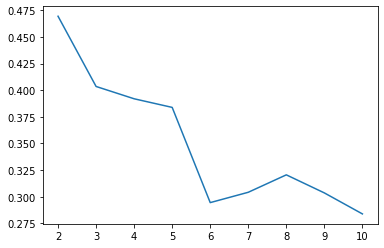

In [17]:
# Finding value of k using Silhouette Score

ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k, random_state=100).fit(country1)
    ss.append([k, silhouette_score(country1, kmeans.labels_)])

plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])
plt.show()

#### k=3 or k=4 seems to be an optimal value of k

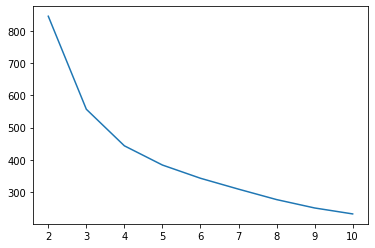

In [18]:
# Finding value of k using Elbow Curve

ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k, random_state=100).fit(country1)
    ssd.append([k, kmean.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])
plt.show()

#### k=3 seems to be an optimal value of k

#### Since both give an indication that k=3 is optimal, we will go ahead with k=3

In [19]:
# Building final model with k=3

kmeans = KMeans(n_clusters=3, max_iter=50, random_state=100)
kmeans.fit(country1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [20]:
# Assigning the cluster labels

country_kmean = country.copy()
country_kmean['cluster_id'] = kmeans.labels_
country_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,5530.0,4191.74,24829.7,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,114520.0,26789.50,198774.0,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,171264.0,18598.20,140044.0,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,219919.0,10060.50,151437.0,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,555100.0,73566.00,718580.0,19100.0,1.44,76.8,2.13,12200.0,2


In [21]:
# Number of countries in each cluster

country_kmean.cluster_id.value_counts()

2    90
1    48
0    29
Name: cluster_id, dtype: int64

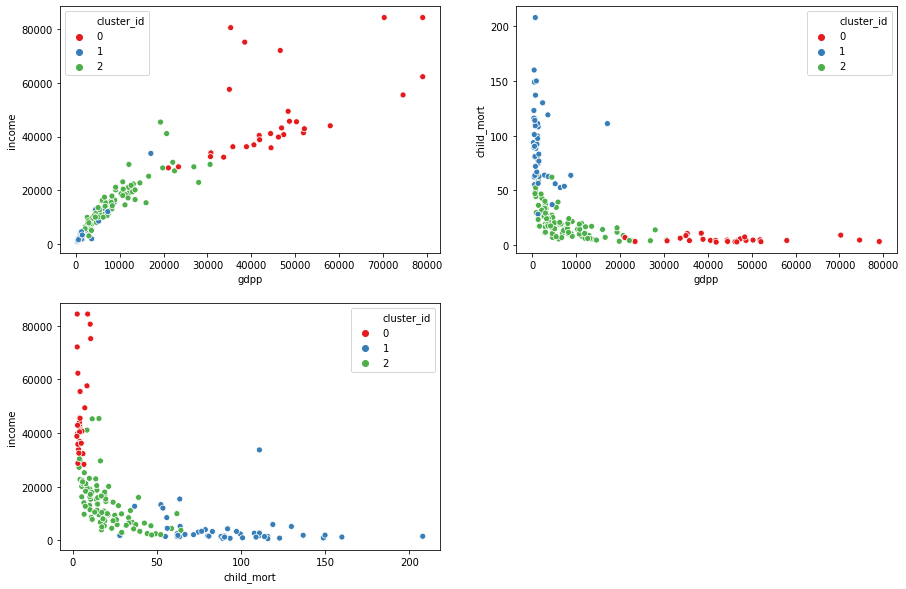

In [22]:
# Plotting the clusters formed

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_id', data = country_kmean, palette = 'Set1')

plt.subplot(2,2,2)
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_id', data = country_kmean, palette = 'Set1')

plt.subplot(2,2,3)
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_id', data = country_kmean, palette = 'Set1')

plt.show()

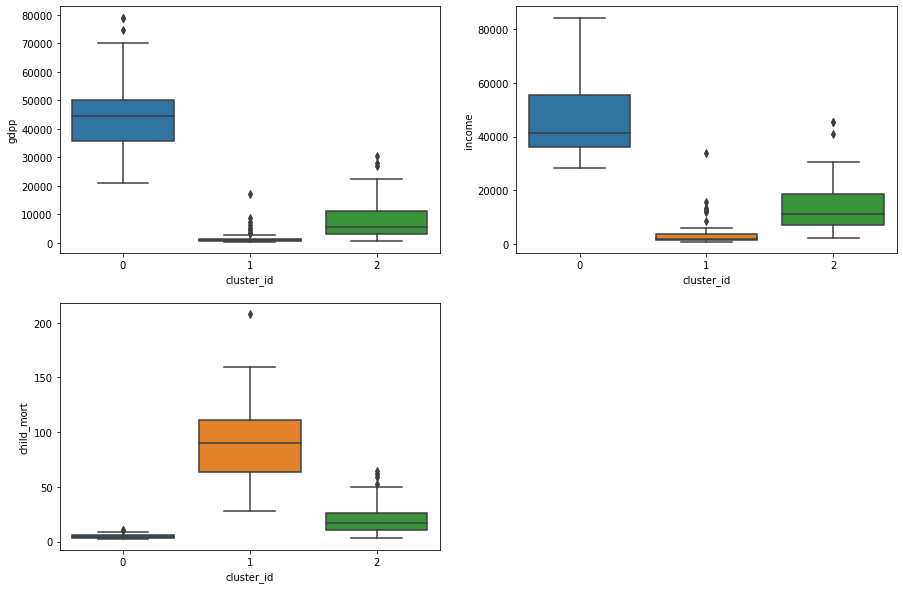

In [23]:
# Plotting the clusters formed

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(x='cluster_id', y='gdpp', data=country_kmean)

plt.subplot(2,2,2)
sns.boxplot(x='cluster_id', y='income', data=country_kmean)

plt.subplot(2,2,3)
sns.boxplot(x='cluster_id', y='child_mort', data=country_kmean)

plt.show()

In [24]:
# Cluster Profiling

country_kmean[['child_mort','income','gdpp','cluster_id']].groupby('cluster_id').mean()

,child_mort,income,gdpp
cluster_id,,,
0,4.982759,47784.413793,46068.137931
1,91.610417,3897.354167,1909.208333
2,20.547778,13804.333333,7808.577778


#### Looking at the above statistics and plots, we see that the following clusters are formed:
#### 0 - Low child mortality, high income and high gdp
#### 1 - High child mortality, low income and low gdp
#### 2 - Moderate child mortality, income and gdp

#### Therefore, cluster 1 is the cluster which will require financial aid

In [25]:
# Top 20 countries requiring financial aid out of the 48 countries lying in cluster 1 after k-means clustering

finan_aid_country_kmean = country_kmean[country_kmean['cluster_id']==1][['country','child_mort','income','gdpp']].sort_values(['gdpp','income','child_mort'],ascending=[True,True,False]).reset_index(drop=True)
finan_aid_country_kmean.head(20)

,country,child_mort,income,gdpp
0,Burundi,93.6,764.0,231.0
1,Liberia,89.3,700.0,327.0
2,"Congo, Dem. Rep.",116.0,609.0,334.0
3,Niger,123.0,814.0,348.0
4,Sierra Leone,160.0,1220.0,399.0
5,Madagascar,62.2,1390.0,413.0
6,Mozambique,101.0,918.0,419.0
7,Central African Republic,149.0,888.0,446.0
8,Malawi,90.5,1030.0,459.0
9,Eritrea,55.2,1420.0,482.0


# Hierarchical Clustering

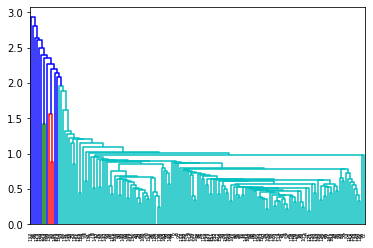

In [26]:
# Single linkage clustering

mergings = linkage(country1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Single linkage does not give clear interpretable clusters so we will go with complete linkage

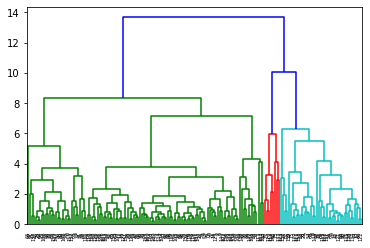

In [27]:
# Complete linkage clustering

mergings = linkage(country1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Using the number of clusters as 3 seems optimal through the above dendrogram and as we got it through silhouette score and elbow curve analysis too

In [28]:
# Building model with 3 clusters

cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
country_hier = country.copy()
country_hier['cluster_labels'] = cluster_labels
country_hier.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,5530.0,4191.74,24829.7,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,114520.0,26789.50,198774.0,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,171264.0,18598.20,140044.0,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,219919.0,10060.50,151437.0,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,555100.0,73566.00,718580.0,19100.0,1.44,76.8,2.13,12200.0,1


In [29]:
# Number of countries in each cluster

country_hier.cluster_labels.value_counts()

0    118
1     41
2      8
Name: cluster_labels, dtype: int64

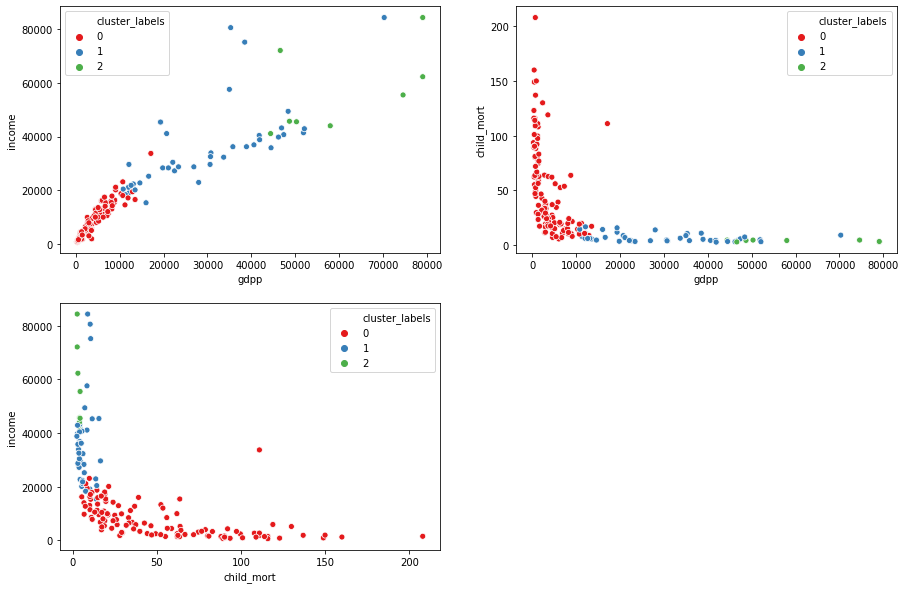

In [30]:
# Plotting the clusters formed

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_labels', data = country_hier, palette = 'Set1')

plt.subplot(2,2,2)
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_labels', data = country_hier, palette = 'Set1')

plt.subplot(2,2,3)
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_labels', data = country_hier, palette = 'Set1')

plt.show()

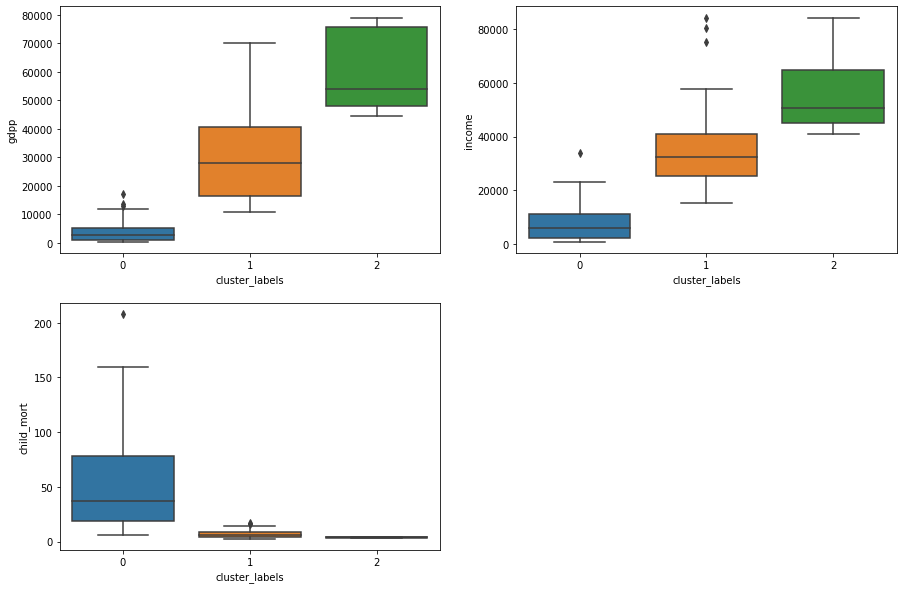

In [31]:
# Plotting the clusters formed

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(x='cluster_labels', y='gdpp', data=country_hier)

plt.subplot(2,2,2)
sns.boxplot(x='cluster_labels', y='income', data=country_hier)

plt.subplot(2,2,3)
sns.boxplot(x='cluster_labels', y='child_mort', data=country_hier)

plt.show()

In [32]:
# Cluster Profiling

country_hier[['child_mort','income','gdpp','cluster_labels']].groupby('cluster_labels').mean()

,child_mort,income,gdpp
cluster_labels,,,
0,51.512712,7581.889831,3732.322034
1,6.878049,35853.024390,29492.682927
2,3.825000,56321.750000,60097.000000


#### Looking at the above statistics and plots, we see that the following clusters are formed:
#### 0 - High child mortality, low income and low gdp
#### 1 - Moderate child mortality, income and gdp
#### 2 - Low child mortality, high income and high gdp

#### Therefore, cluster 0 is the cluster which will require financial aid

In [33]:
# Top 20 countries requiring financial aid out of the 118 countries lying in cluster 0 after hierarchical clustering

finan_aid_country_hier = country_hier[country_hier['cluster_labels']==0][['country','child_mort','income','gdpp']].sort_values(['gdpp','income','child_mort'],ascending=[True,True,False]).reset_index(drop=True)
finan_aid_country_hier.head(20)

,country,child_mort,income,gdpp
0,Burundi,93.6,764.0,231.0
1,Liberia,89.3,700.0,327.0
2,"Congo, Dem. Rep.",116.0,609.0,334.0
3,Niger,123.0,814.0,348.0
4,Sierra Leone,160.0,1220.0,399.0
5,Madagascar,62.2,1390.0,413.0
6,Mozambique,101.0,918.0,419.0
7,Central African Republic,149.0,888.0,446.0
8,Malawi,90.5,1030.0,459.0
9,Eritrea,55.2,1420.0,482.0


In [34]:
# Top 10 countries requiring financial aid out of the 48 countries lying in cluster 1 after k-means clustering

finan_aid_country_kmean.head(10)

,country,child_mort,income,gdpp
0,Burundi,93.6,764.0,231.0
1,Liberia,89.3,700.0,327.0
2,"Congo, Dem. Rep.",116.0,609.0,334.0
3,Niger,123.0,814.0,348.0
4,Sierra Leone,160.0,1220.0,399.0
5,Madagascar,62.2,1390.0,413.0
6,Mozambique,101.0,918.0,419.0
7,Central African Republic,149.0,888.0,446.0
8,Malawi,90.5,1030.0,459.0
9,Eritrea,55.2,1420.0,482.0


In [35]:
# Top 10 countries requiring financial aid out of the 118 countries lying in cluster 0 after hierarchical clustering

finan_aid_country_hier.head(10)

,country,child_mort,income,gdpp
0,Burundi,93.6,764.0,231.0
1,Liberia,89.3,700.0,327.0
2,"Congo, Dem. Rep.",116.0,609.0,334.0
3,Niger,123.0,814.0,348.0
4,Sierra Leone,160.0,1220.0,399.0
5,Madagascar,62.2,1390.0,413.0
6,Mozambique,101.0,918.0,419.0
7,Central African Republic,149.0,888.0,446.0
8,Malawi,90.5,1030.0,459.0
9,Eritrea,55.2,1420.0,482.0


#### Clearly, both kmeans and hierarchical clustering say that the following countries are in most need of financial aid, that is, indicating high child mortality rate, low income and low GDP:
1. Burundi
2. Liberia
3. Democratic Republic of Congo
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea